# Ï†ÑÌÜµÏ†Å ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÎßÅ

   ## Ïú†ÌÜµÎß§Ïû• ÏàòÏöîÎüâ ÏòàÏ∏°

* ÎπÑÏ¶àÎãàÏä§ ÌòÑÌô©
    * Í≥†Í∞ùÏÇ¨Îäî A Ïú†ÌÜµÌöåÏÇ¨Ïùò a Îß§Ïû• ÏûÖÎãàÎã§.
    * a Îß§Ïû•ÏóêÏÑú Ï£ºÎ†•ÏÉÅÌíàÏù∏ a01Ïóê ÎåÄÌïú Ïû¨Í≥† ÏµúÏ†ÅÌôîÎ•º ÏúÑÌï¥ ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.
    * ÏµúÍ∑º Í≤ΩÏüÅÏÇ¨Ïùò Îß§Ïû•Ïù¥ Í∞ÄÍπåÏö¥ Í±∞Î¶¨Ïóê Ïò§ÌîàÌïòÏòÄÍ≥†, Ïú†ÏÇ¨Ìïú ÏÉÅÌíàÏóê ÎåÄÌïú Í≥µÍ≤©Ï†ÅÏù∏ ÎßàÏºÄÌåÖÏùÑ ÌéºÏπòÍ≥† ÏûàÏäµÎãàÎã§. 
* Î∞úÏ£º ÏµúÏ†ÅÌôîÎ•º ÏúÑÌïú ÏàòÏöîÎüâ ÏòàÏ∏°
    * ÏùºÎßàÍ∞ê Ïù¥ÌõÑ, Î∞úÏ£ºÎüâÏùÑ Í≤∞Ï†ïÌï† Îïå, ÏòàÏ∏°Îêú ÏàòÏöîÎüâÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.
    * Î∞úÏ£ºÌõÑ ÏûÖÍ≥†ÍπåÏßÄÎäî 2ÏùºÏùò Í∏∞Í∞ÑÏù¥ Í±∏Î¶ΩÎãàÎã§. 
    * ÏòàÎ•º Îì§Î©¥ 
        * 2019ÎÖÑ 6Ïõî 1Ïùº Ï†ÄÎÖÅ 10Ïãú ÏùºÎßàÍ∞ê ÏßÅÌõÑ, 6Ïõî 3ÏùºÏùò ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°Ìï¥Ïïº Ìï©ÎãàÎã§.


![](https://www.artefact.com//wp-content/uploads/2021/08/GettyImages-1295864156-scaled.jpg)

# 1.ÌôòÍ≤Ω Ï§ÄÎπÑ

## (1) Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## (2) Data Loading

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path)
data = data.loc[(data['date']>= '2013-06-01') & (data['date']< '2015-07-01')].reset_index(drop = True)
data.head(10)

date  item  sales  tot_sales  comp_sales
0  2013-06-01    28    124       1016          80
1  2013-06-02    28    139       1019          93
2  2013-06-03    28     77        676          65
3  2013-06-04    28     93        764          80
4  2013-06-05    28    117        818          80
5  2013-06-06    28    112        881          71
6  2013-06-07    28    127        929          81
7  2013-06-08    28    105        925          78
8  2013-06-09    28    129        998          95
9  2013-06-10    28    103        710          74

* Î≥ÄÏàò ÏÑ§Î™Ö

    * date : ÎÇ†Ïßú
    * item : ÏÉÅÌíàÏΩîÎìú (Ïó¨Í∏∞ÏÑúÎäî ÌïúÍ∞ÄÏßÄ ÏÉÅÌíàÎßå ÏûàÏùå)
    * sales : AÏú†ÌÜµÌöåÏÇ¨ a Îß§Ïû• ÌåêÎß§Îüâ ==> target
    * tot_sales : AÏú†ÌÜµÌöåÏÇ¨ Ï†ÑÏ≤¥ ÌåêÎß§Îüâ
    * comp_sales : Ïù∏Í∑ºÏóê ÏúÑÏπòÌïú BÏú†ÌÜµÌöåÏÇ¨ b Îß§Ïû• ÌåêÎß§Îüâ

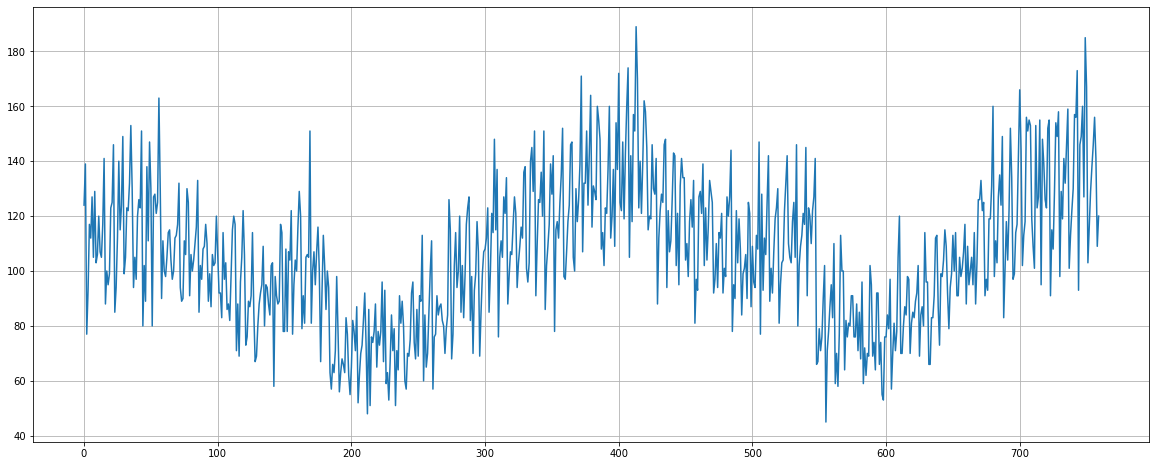

In [3]:
plt.figure(figsize = (20,8))
plt.plot(data['sales'])
plt.grid()
plt.show()

## (3) Ìï®Ïàò ÏÉùÏÑ± 

* ÏûîÏ∞®Î∂ÑÏÑù

In [4]:
def residual_diag(residuals, lags = 20) :

    print('* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

# 2.Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ 

## (1) ÏãúÍ∞ÑÏ†ïÎ≥¥ Ïù∏Îç±Ïä§ ÎßåÎì§Í∏∞
* ÎÇ†Ïßú ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
* ÎÇ†ÏßúÎ•º Ïù∏Îç±Ïä§Î°ú
* freq ÏßÄÏ†ïÌïòÍ∏∞

### 1) ÎÇ†Ïßú ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ∏∞

In [9]:
data['date'] = pd.to_datetime(data['date'])

### 2) ÎÇ†ÏßúÎ•º Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôòÌïòÍ∏∞

In [11]:
data['DT'] = data['date']
data.set_index('DT', inplace=True)
data.head()

date  item  sales  tot_sales  comp_sales
DT                                                       
2013-06-01 2013-06-01    28    124       1016          80
2013-06-02 2013-06-02    28    139       1019          93
2013-06-03 2013-06-03    28     77        676          65
2013-06-04 2013-06-04    28     93        764          80
2013-06-05 2013-06-05    28    117        818          80

### 3) ÎÇ†ÏßúÎã®ÏúÑ ÏßÄÏ†ïÌïòÍ∏∞ : freq

* **Î∂ÑÏÑù Îã®ÏúÑ**Î•º Ïñ¥ÎñªÍ≤å Í∞ÄÏ†∏Í∞à Í≤ÉÏù∏Í∞ÄÏôÄ Í¥ÄÎ†®Ïù¥ ÏûàÏäµÎãàÎã§.
* ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º **ÏùºÏ†ïÌïú ÏãúÍ∞Ñ Í∞ÑÍ≤©**ÏúºÎ°ú ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
* Ïù∏Îç±Ïä§ Ï°∞ÌöåÏãú, ÎßàÏßÄÎßâÏóê ÏûàÎäî **freq** ÏòµÏÖò

In [15]:
# ÏùºÎã®ÏúÑ
data.asfreq('D').head()
df = data.asfreq('D')
df.head()

date  item  sales  tot_sales  comp_sales
DT                                                       
2013-06-01 2013-06-01    28    124       1016          80
2013-06-02 2013-06-02    28    139       1019          93
2013-06-03 2013-06-03    28     77        676          65
2013-06-04 2013-06-04    28     93        764          80
2013-06-05 2013-06-05    28    117        818          80

## (2) y ÎßåÎì§Í∏∞
2ÏùºÌõÑÏùò ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°Ìï¥Ïïº Ìï©ÎãàÎã§.

In [16]:
df['y'] = df['sales'].shift(-1)
display(df.head())
display(df.tail())

date  item  sales  tot_sales  comp_sales      y
DT                                                              
2013-06-01 2013-06-01    28    124       1016          80  139.0
2013-06-02 2013-06-02    28    139       1019          93   77.0
2013-06-03 2013-06-03    28     77        676          65   93.0
2013-06-04 2013-06-04    28     93        764          80  117.0
2013-06-05 2013-06-05    28    117        818          80  112.0

date  item  sales  tot_sales  comp_sales      y
DT                                                              
2015-06-26 2015-06-26    28    146       1177         100  156.0
2015-06-27 2015-06-27    28    156       1171         118  141.0
2015-06-28 2015-06-28    28    141       1215         129  109.0
2015-06-29 2015-06-29    28    109        834          76  120.0
2015-06-30 2015-06-30    28    120        984         102    NaN

## (3) NaN Ï°∞Ïπò 
* y ÏÉùÏÑ±ÏúºÎ°ú Ïù∏Ìï¥ NaNÏù¥ Î∞úÏÉùÎêòÏóàÏäµÎãàÎã§. Ïñ¥ÎñªÍ≤å Ï°∞ÏπòÌï¥Ïïº Ìï†ÍπåÏöî?

In [17]:
# Ï†úÏùº ÎßàÏßÄÎßâ ÌñâÏùÄ ÏÇ≠Ï†ú
df.dropna(axis = 0, inplace = True)
df.tail()

date  item  sales  tot_sales  comp_sales      y
DT                                                              
2015-06-25 2015-06-25    28    138       1062         120  146.0
2015-06-26 2015-06-26    28    146       1177         100  156.0
2015-06-27 2015-06-27    28    156       1171         118  141.0
2015-06-28 2015-06-28    28    141       1215         129  109.0
2015-06-29 2015-06-29    28    109        834          76  120.0

## (4) Í∞ÄÎ≥ÄÏàòÌôî

## (5) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

* Cross Validation : Îç∞Ïù¥ÌÑ∞Ïùò ÎßàÏßÄÎßâ 6Í∞úÏõîÏùÑ 6Îì±Î∂ÑÌï¥ÏÑú ÍµêÏ∞® Í≤ÄÏ¶ùÌï¥ Î¥ÖÏãúÎã§.
    * fold : 6
    * validation size : 1Í∞úÏõî(30Ïùº)

### 1) x, y ÎÇòÎàÑÍ∏∞

In [18]:
target = 'y'

x = df.drop([target, 'date'], axis = 1)
y = df.loc[:, target]

### 2) ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [19]:
from sklearn.model_selection import TimeSeriesSplit

In [20]:
# validation set size
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)

# 4.Î™®Îç∏ÎßÅ : Baseline Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import * 

## (1) Cross Validation

* for loopÎ•º Ïù¥Ïö©ÌïòÏó¨ Cross ValidationÏùÑ ÏàòÌñâÌïòÏãúÏò§.
* ÏïåÍ≥†Î¶¨Ï¶òÏùÄ LinearRegressionÏùÑ Ïù¥Ïö©ÌïòÏó¨ defaultÎ°ú ÏÇ¨Ïö©

In [22]:
model = LinearRegression()

In [23]:
rmse, mae, mape = [],[],[]
residuals = []
pred = []

for train_index, val_index in tscv.split(x):

    # Ïù∏Îç±Ïä§Î°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
    x_train, y_train = x.iloc[train_index], y.iloc[train_index]
    x_val, y_val = x.iloc[val_index], y.iloc[val_index]

    # ÌïôÏäµ
    model.fit(x_train, y_train)

    # ÏòàÏ∏°
    pr = model.predict(x_val)
    pred += list(pr)

    # ÌèâÍ∞Ä
    rmse.append(mean_squared_error(y_val, pr, squared = False))
    mae.append(mean_absolute_error(y_val, pr))
    mape.append(mean_absolute_percentage_error(y_val, pr))

    # ÏûîÏ∞® : Í∞Å foldÏùò Í≤∞Í≥ºÎ•º Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌïòÏó¨ Ï∂îÍ∞Ä
    residuals += list(y_val - pr)

## (2) ÏòàÏ∏° Í≤∞Í≥º ÌèâÍ∞Ä

### 1) RMSE, MAE, MAPE

In [24]:
print('RMSE : ',round(np.mean(rmse),4))
print('MAE  : ',round(np.mean(mae),4))
print('MAPE : ',round(np.mean(mape),4))

RMSE :  24.6962
MAE  :  20.2368
MAPE :  0.1601


### 2) Í∑∏ÎûòÌîÑ ÎπÑÍµê

In [25]:
n = val_size * nfold
pred = pd.Series(pred, index = y[-n:].index)

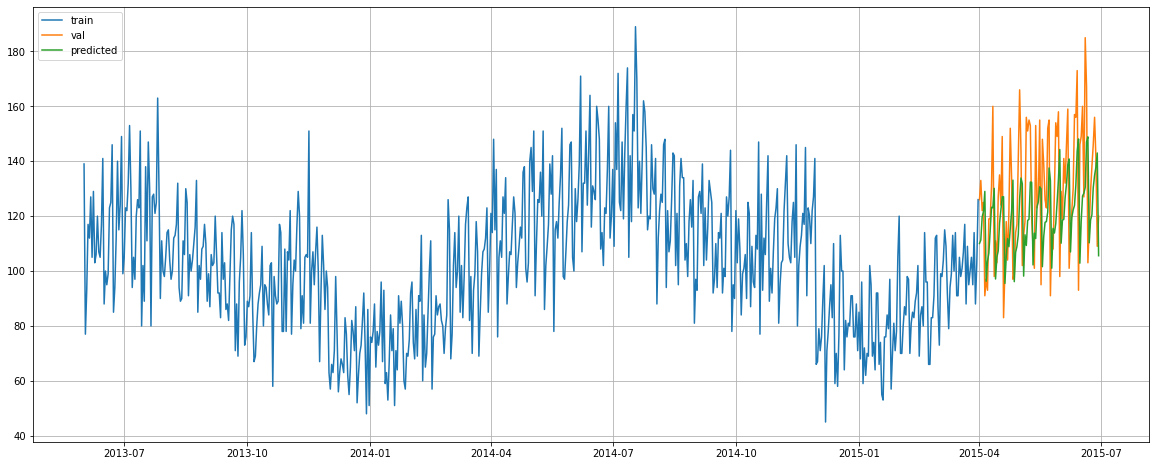

In [26]:
plt.figure(figsize = (20,8))
plt.plot(y[:-n], label = 'train')
plt.plot(y[-n:], label = 'val')
plt.plot(pred, label = 'predicted')

plt.legend()
plt.grid()
plt.show()

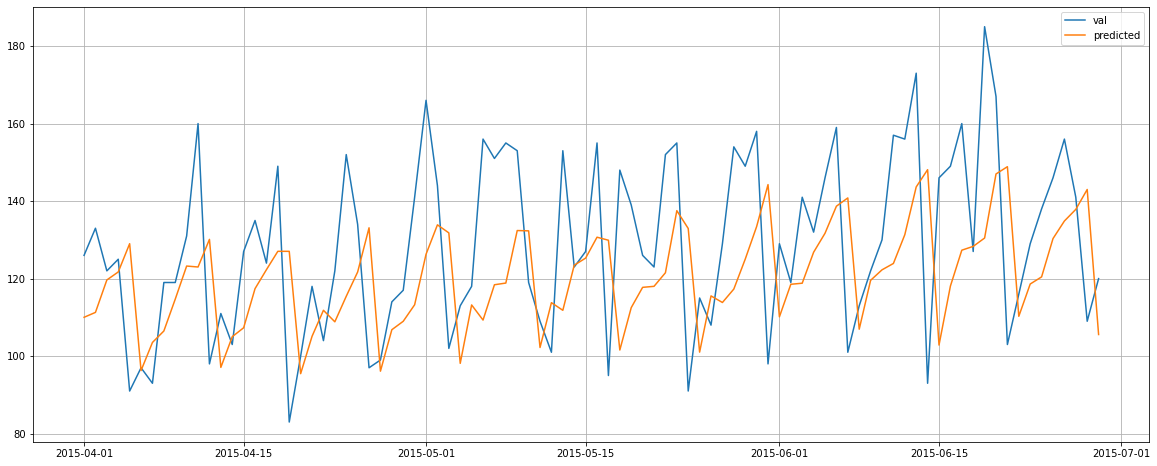

In [28]:
plt.figure(figsize = (20,8))
plt.plot(y[-n:], label = 'val')
plt.plot(pred, label = 'predicted')

plt.legend()
plt.grid()
plt.show()

# 5.ÌèâÍ∞Ä : ÏûîÏ∞®Î∂ÑÏÑù

## (1) ÏãúÍ∞ÅÌôî

* ÏûîÏ∞®Ïóê ÎåÄÌï¥ ÎùºÏù∏Ï∞®Ìä∏, ÌûàÏä§ÌÜ†Í∑∏Îû® Îì±ÏùÑ Í∑∏Î†§Î¥ÖÏãúÎã§.

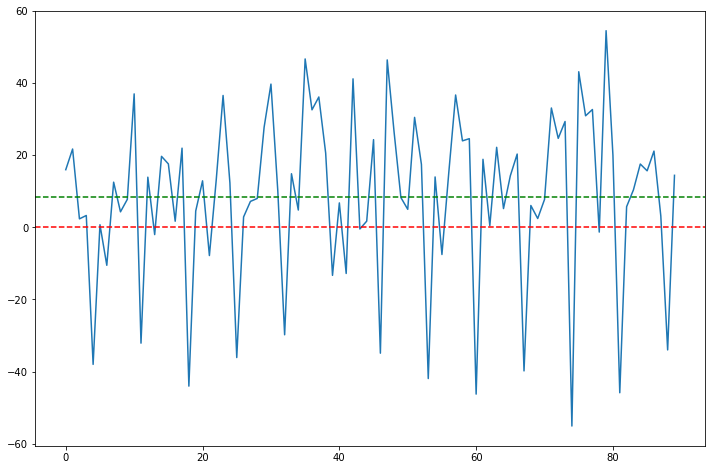

In [27]:
plt.figure(figsize = (12,8))
plt.plot(residuals)
plt.axhline(0, color = 'r', ls = '--')
plt.axhline(np.mean(residuals), color = 'g', ls = '--')
plt.show()

## (2) ACF, PACF

* acf, pacf Í∑∏Î¶ºÏùÑ Í∑∏Î†§ ÏûêÍ∏∞ ÏÉÅÍ¥ÄÏÑ± Ïó¨Î∂ÄÎ•º ÌåêÎã®Ìï¥ Î¥ÖÏãúÎã§.

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

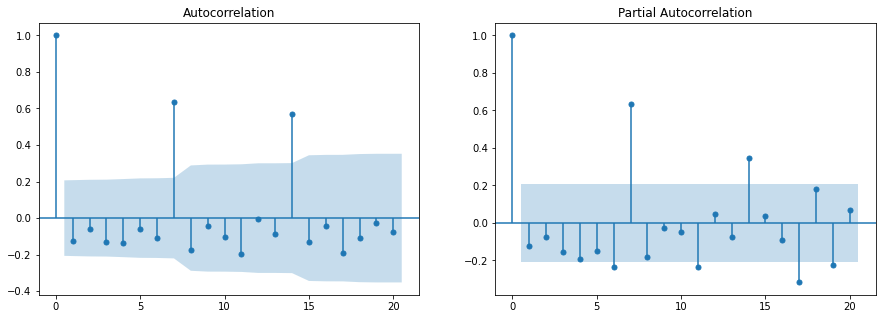

In [30]:
lags = 20

fig,ax = plt.subplots(1,2, figsize = (15,5))
plot_acf(residuals, lags = lags, ax = ax[0])
plot_pacf(residuals, lags = lags, ax = ax[1])
plt.show()

## (3) Í≤ÄÏ†ï

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï, Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌïòÍ≥† ÌåêÏ†ïÌï¥ Î¥ÖÏãúÎã§.

In [31]:
from scipy import stats
import statsmodels.api as sm

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï : Shapiro-Wilk Í≤ÄÏ†ï

In [32]:
stats.shapiro(residuals)[1]

0.00014496559742838144

* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï : ADF Í≤ÄÏ†ï

In [33]:
sm.tsa.stattools.adfuller(residuals)[1]

0.06254852345540264

# 6.Î™®Îç∏ÎßÅ : ARIMA

In [34]:
from sklearn.metrics import *

## (1) y Í∞í ÏÇ¥Ìé¥Î≥¥Í∏∞

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00052
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.67934
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


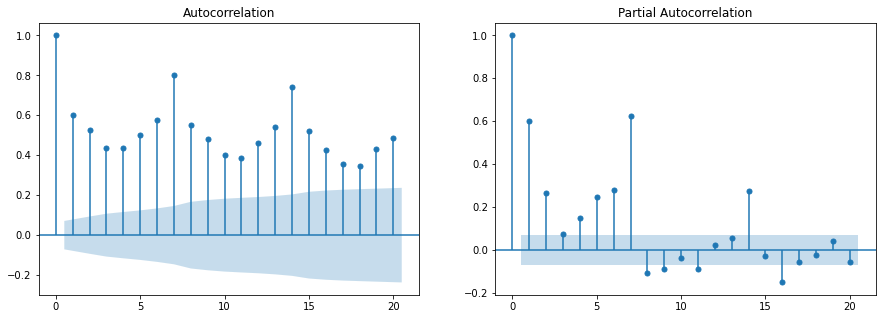

In [35]:
residual_diag(y, lags = 20)

## (2) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

* p, d, q Í∞íÏùÑ Ïñ¥ÎñªÍ≤å Ï†ïÌï¥Ïïº Ìï†ÍπåÏöî?
* ARÏùò p Ï∞®ÏàòÏôÄ MA q Ï∞®Ïàò Î™®Îëê Í∞íÏù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÖÎãàÎã§. ÏùºÎã® 1, 1ÏùÑ ÏßÄÏ†ïÌï©ÏãúÎã§.

In [36]:
train = y[:-30]
val = y[-30:]

### 1) ÌïôÏäµ

* sm.tsa.SARIMAX(train, order=(p,d,q)).fit()
    * Î™®Îç∏ ÏÑ†Ïñ∏Ïãú trainÏù¥ Ìè¨Ìï®
    * .fit()ÏúºÎ°ú ÌïôÏäµ.

In [38]:
model1 = sm.tsa.SARIMAX(y_train, order=(1,1,1)).fit() # ARIMA

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0006
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


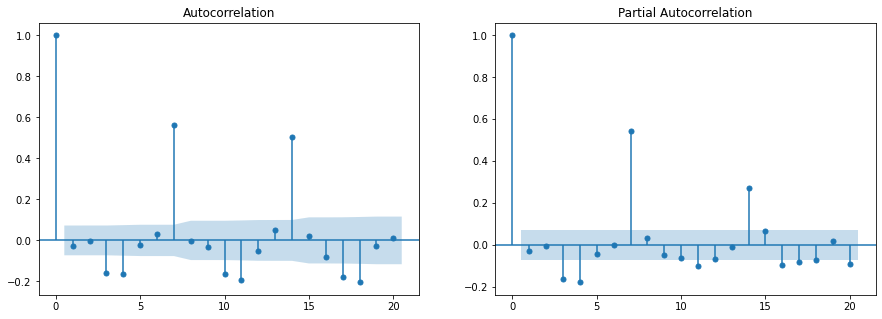

In [40]:
residuals = model1.resid  # y_trainÍ≥º ÏòàÏ∏°Í∞í Ï∞®Ïù¥
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [41]:
print('model1 AIC :', model1.aic)

model1 AIC : 6279.816023439711


#### ‚ë¢ Validation

ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏóê ÎåÄÌï¥ ÎπÑÍµêÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î¥ÖÏãúÎã§.

In [42]:
pred = model1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 19.430314178834617
MAPE: 0.15004726153916972


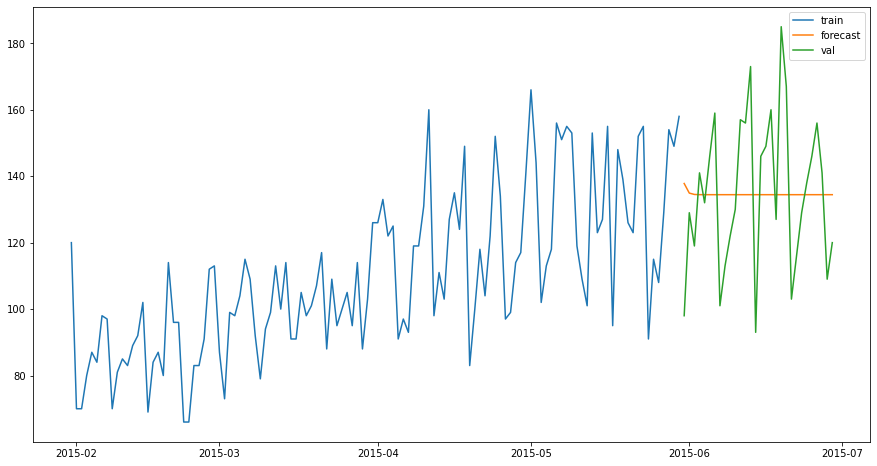

In [43]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend()
plt.show()

## (3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

### 1) ÌïôÏäµ

In [45]:
from itertools import product

* Í∞íÏùò Î≤îÏúÑ ÏßÄÏ†ï

In [46]:
# product Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞íÏùò Ï°∞Ìï©ÏùÑ Íµ¨ÏÑ±
p = [1,2,3,4]
q = [1,2,3,4]
d = [1,2]
iter = list(product(p,d,q))
iter

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4)]

In [48]:
# 
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)
(4, 2, 1)
(4, 2, 2)
(4, 2, 3)
(4, 2, 4)


In [49]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(p,d,q)        mae          aic
18     (3, 1, 3)  14.035671  5993.733749

params(p,d,q)        mae          aic
27     (4, 1, 4)  14.458549  5988.776939

In [50]:
model2_1 = sm.tsa.SARIMAX(y_train, order=(3,1,3)).fit()
model2_2 = sm.tsa.SARIMAX(y_train, order=(4,1,4)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


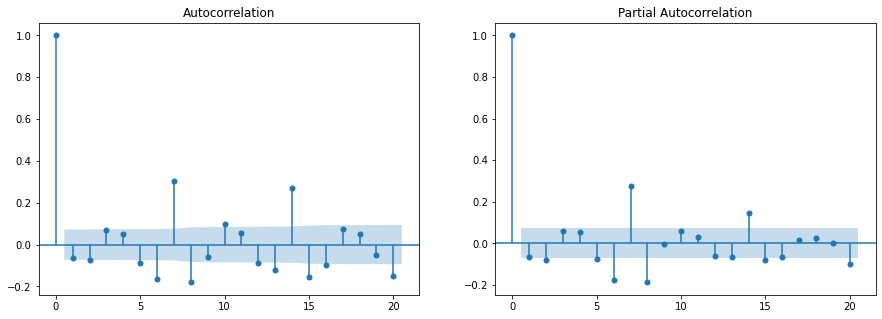

In [51]:
residuals = model2_1.resid
residual_diag(residuals) 

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  1e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


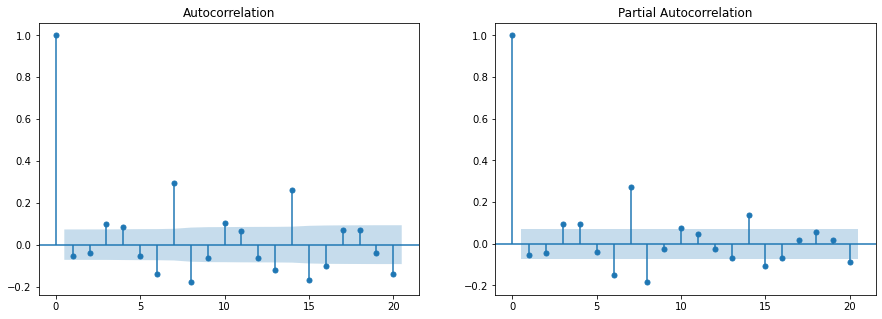

In [52]:
residuals = model2_2.resid
residual_diag(residuals) 

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [53]:
print('model2 AIC :', model2_1.aic)
print('model2 AIC :', model2_2.aic)

model2 AIC : 5993.733748965036
model2 AIC : 5988.776939336642


#### ‚ë¢ Validation(Í∑∏ÎûòÌîÑ ÎπÑÍµê)


In [56]:
p1 = model2_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, p1))
print('MAPE:', mean_absolute_percentage_error(y_val, p1))

MAE : 14.03567136621148
MAPE: 0.10719695944408775


In [60]:
p1 = model2_2.forecast(30)
print('MAE :', mean_absolute_error(y_val, p1))
print('MAPE:', mean_absolute_percentage_error(y_val, p1))

MAE : 14.45854931828953
MAPE: 0.1102505018126945


In [58]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

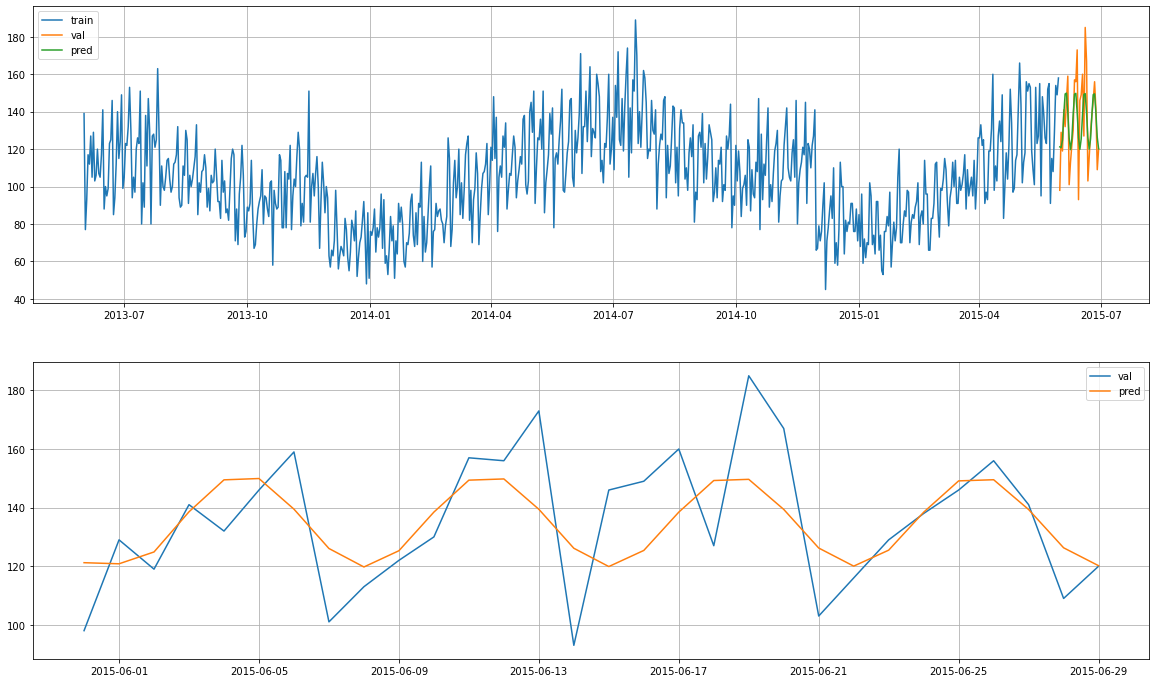

In [59]:
plot_model_result(y_train, y_val, p1)

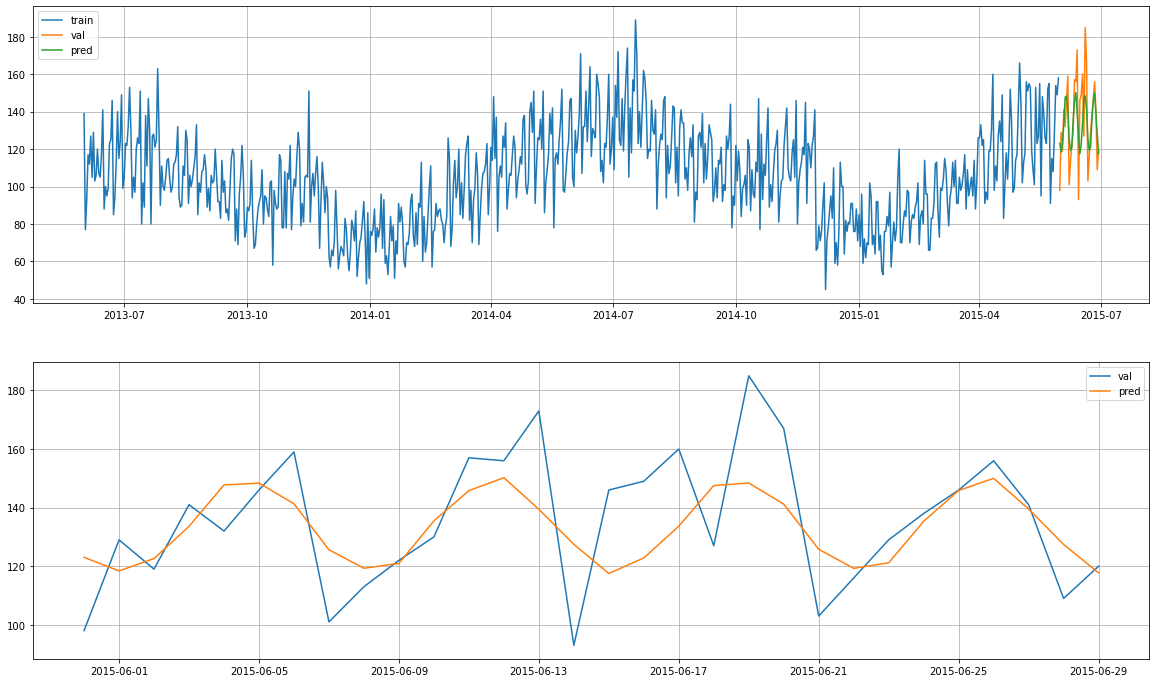

In [61]:
plot_model_result(y_train, y_val, p1)

## (4) Cross Validation

### 1) ÌïôÏäµ

In [62]:
rmse, mae, mape, aic = [],[],[],[]
residuals = []
preds = []
p,d,q = 2,2,3

for train_index, val_index in tscv.split(x):

    # Ïù∏Îç±Ïä§Î°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
    train = y[train_index]
    val = y[val_index]

    # ÌïôÏäµ
    model = sm.tsa.SARIMAX(train, order=(p,d,q)).fit()

    # ÏòàÏ∏°
    pred = model.forecast(val_size)
    preds += list(pred)

    # ÏûîÏ∞® Ï†ÄÏû•
    residuals += list(model.resid)

    # ÌèâÍ∞Ä
    rmse.append(mean_squared_error(val, pred, squared = False))
    mae.append(mean_absolute_error(val, pred))
    mape.append(mean_absolute_percentage_error(val, pred))
    aic.append(model.aic)

In [63]:
print('RMSE : ',round(np.mean(rmse),4))
print('MAE  : ',round(np.mean(mae),4))
print('MAPE : ',round(np.mean(mape),4))

RMSE :  22.4573
MAE  :  18.7869
MAPE :  0.1607


### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

#### ‚ë¢ Validation

In [ ]:
n = nfold * val_size

In [ ]:
preds = pd.Series(preds, index = y[-n:].index)
print('MAE :', mean_absolute_error(y[-n:], preds))

plt.figure(figsize = (20,8))
plt.plot(y[-200:], label = 'train')
plt.plot(y[-n:], label = 'val')
plt.plot(preds, label = 'predicted')

plt.legend()
plt.grid()
plt.show()

# 7.Î™®Îç∏ÎßÅ : SARIMA

## (1) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

In [ ]:
train = y[:-30]
val = y[-30:]

### 1) ÌïôÏäµ

In [ ]:
model1 = sm.tsa.SARIMAX(train, order=(2,2,3), seasonal_order = (1,1,1,7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

#### ‚ë° AIC

#### ‚ë¢ Validation(Í∑∏ÎûòÌîÑ ÎπÑÍµê)


## (2) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

### 1) ÌïôÏäµ

In [ ]:
from itertools import product

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

#### ‚ë° AIC

#### ‚ë¢ Validation(Í∑∏ÎûòÌîÑ ÎπÑÍµê)


## (3) Cross Validation

### 1) ÌïôÏäµ

### 2) ÌèâÍ∞Ä1

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

#### ‚ë° AIC

#### ‚ë¢ Validation(Í∑∏ÎûòÌîÑ ÎπÑÍµê)


# 8.Î™®Îç∏ÎßÅ : SARIMAX

## (1) Î™®Îç∏ÎßÅ

### 1) ÌïôÏäµ

In [ ]:
val_size = 30
x_train, y_train = x[:-val_size], y[:-val_size]
x_val, y_val = x[-val_size:], y[-val_size:]

In [ ]:
x_train.shape, y_train.shape

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

#### ‚ë° AIC

#### ‚ë¢ Validation (Í∑∏ÎûòÌîÑÎπÑÍµê)
SARIMAX Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, ÏòàÏ∏°Ìï† ÎïåÎäî exog=x_val ÏòµÏÖòÏù¥ Îì§Ïñ¥Í∞ÄÏïº Ìï®.

In [ ]:
pred = model3_1.forecast(30,  exog=x_val)
mean_absolute_error(val, pred)

## (2) Cross Validation

### 1) ÌïôÏäµ

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

#### ‚ë° AIC

#### ‚ë¢ Validation(Í∑∏ÎûòÌîÑ ÎπÑÍµê)


-------